# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [19]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth orbiting the sun

In [68]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
km = UNITS.kilometer

<Unit('kilometer')>

In [138]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(x=147166462* 1000 * m, y=0 * m, vx=0*m/s, vy=30330*m/s)

,values
x,147166462000 meter
y,0 meter
vx,0.0 meter / second
vy,30330.0 meter / second


In [156]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m
helion = 147166462* km

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=32e6 * s)

,values
init,x 147166462000 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,32000000.0 second


In [157]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, G, r1, r2
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x,y)
    print(r)
    force = r.hat() * (-1) * G * m1 * m2/ (r.mag**2)
    return force

In [158]:
universal_gravitation(init, system)

[147166462000            0] meter


<Quantity([-6.4146415e+28 -0.0000000e+00], 'newton')>

In [159]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dxdt = vx #velocity is derivative of position
    dydt = vy
    dvxdt = force.x /m2 #using f=ma and solving for a=f/m
    dvydt = force.y/m2
    
    return dxdt, dydt, dvxdt, dvydt

In [160]:
# Always test the slope function

slope_func(init, 0, system)

[147166462000            0] meter


(<Quantity(0.0, 'meter / second')>,
 <Quantity(30330.0, 'meter / second')>,
 <Quantity(-10741.194747247966, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [161]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, v = state
    return init.x - helion 

In [165]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, max_step=1e4)
results

[1.47166462e+11 0.00000000e+00] dimensionless
[1.47166462e+11 1.41421354e-05] dimensionless
[1.47166462e+11 2.82842708e-04] dimensionless
[1.47166462e+11 4.24264062e-04] dimensionless
[1.47166462e+11 1.13137083e-03] dimensionless
[1.47166462e+11 1.25707870e-03] dimensionless
[1.47166462e+11 1.41421354e-03] dimensionless
[1.47166462e+11 1.41421354e-03] dimensionless
[1.47166462e+11 4.24264062e-03] dimensionless
[1.47166462e+11 5.65685416e-03] dimensionless
[1.47166462e+11 1.27279219e-02] dimensionless
[1.47166462e+11 1.39850006e-02] dimensionless
[1.47166462e+11 1.55563489e-02] dimensionless
[1.47166462e+11 1.55563489e-02] dimensionless
[1.47166462e+11 4.38406197e-02] dimensionless
[1.47166462e+11 5.79827551e-02] dimensionless
[1.47166462e+11 1.28693432e-01] dimensionless
[1.47166462e+11 1.41264219e-01] dimensionless
[1.47166462e+11 1.56977703e-01] dimensionless
[1.47166462e+11 1.56977703e-01] dimensionless
[1.47166462e+11 4.39820411e-01] dimensionless
[1.47166462e+11 5.81241765e-01] di

[1.47008337e+11 6.88792723e+09] dimensionless
[1.47006930e+11 6.91822394e+09] dimensionless
[1.46999863e+11 7.06970582e+09] dimensionless
[1.46998591e+11 7.09663499e+09] dimensionless
[1.46996994e+11 7.13029638e+09] dimensionless
[1.46996994e+11 7.13029665e+09] dimensionless
[1.46994112e+11 7.19088680e+09] dimensionless
[1.46992643e+11 7.22118054e+09] dimensionless
[1.46985271e+11 7.37264755e+09] dimensionless
[1.46983944e+11 7.39957403e+09] dimensionless
[1.46982279e+11 7.43323207e+09] dimensionless
[1.46982279e+11 7.43323234e+09] dimensionless
[1.46979274e+11 7.49381643e+09] dimensionless
[1.46977745e+11 7.52410708e+09] dimensionless
[1.46970066e+11 7.67555857e+09] dimensionless
[1.46968685e+11 7.70248227e+09] dimensionless
[1.46966952e+11 7.73613680e+09] dimensionless
[1.46966952e+11 7.73613707e+09] dimensionless
[1.46963825e+11 7.79671484e+09] dimensionless
[1.46962234e+11 7.82700228e+09] dimensionless
[1.46954249e+11 7.97843763e+09] dimensionless
[1.46952814e+11 8.00535843e+09] di

[1.44607584e+11 2.75963908e+10] dimensionless
[1.44607583e+11 2.75963910e+10] dimensionless
[1.44596434e+11 2.76559966e+10] dimensionless
[1.44590832e+11 2.76857943e+10] dimensionless
[1.44562792e+11 2.78347766e+10] dimensionless
[1.44557792e+11 2.78612591e+10] dimensionless
[1.44551534e+11 2.78943613e+10] dimensionless
[1.44551534e+11 2.78943615e+10] dimensionless
[1.44540264e+11 2.79539441e+10] dimensionless
[1.44534602e+11 2.79837301e+10] dimensionless
[1.44506262e+11 2.81326544e+10] dimensionless
[1.44501208e+11 2.81591266e+10] dimensionless
[1.44494884e+11 2.81922158e+10] dimensionless
[1.44494883e+11 2.81922160e+10] dimensionless
[1.44483493e+11 2.82517752e+10] dimensionless
[1.44477771e+11 2.82815496e+10] dimensionless
[1.44449130e+11 2.84304151e+10] dimensionless
[1.44444023e+11 2.84568769e+10] dimensionless
[1.44437632e+11 2.84899530e+10] dimensionless
[1.44437632e+11 2.84899532e+10] dimensionless
[1.44426121e+11 2.85494888e+10] dimensionless
[1.44420339e+11 2.85792513e+10] di

[1.37406571e+11 5.32394320e+10] dimensionless
[1.37385082e+11 5.32960744e+10] dimensionless
[1.37374311e+11 5.33243856e+10] dimensionless
[1.37320431e+11 5.34659307e+10] dimensionless
[1.37310838e+11 5.34910883e+10] dimensionless
[1.37298840e+11 5.35225331e+10] dimensionless
[1.37298839e+11 5.35225333e+10] dimensionless
[1.37277236e+11 5.35791314e+10] dimensionless
[1.37266409e+11 5.36074205e+10] dimensionless
[1.37212244e+11 5.37488545e+10] dimensionless
[1.37202600e+11 5.37739923e+10] dimensionless
[1.37190538e+11 5.38054124e+10] dimensionless
[1.37190538e+11 5.38054127e+10] dimensionless
[1.37168821e+11 5.38619662e+10] dimensionless
[1.37157937e+11 5.38902330e+10] dimensionless
[1.37103488e+11 5.40315554e+10] dimensionless
[1.37093793e+11 5.40566733e+10] dimensionless
[1.37081668e+11 5.40880685e+10] dimensionless
[1.37081668e+11 5.40880688e+10] dimensionless
[1.37059837e+11 5.41445776e+10] dimensionless
[1.37048896e+11 5.41728219e+10] dimensionless
[1.36994162e+11 5.43140321e+10] di

[1.21956764e+11 8.32585755e+10] dimensionless
[1.21941857e+11 8.32809314e+10] dimensionless
[1.21923217e+11 8.33088726e+10] dimensionless
[1.21923217e+11 8.33088728e+10] dimensionless
[1.21889661e+11 8.33591632e+10] dimensionless
[1.21872860e+11 8.33842929e+10] dimensionless
[1.21788831e+11 8.35099243e+10] dimensionless
[1.21773879e+11 8.35322496e+10] dimensionless
[1.21755184e+11 8.35601526e+10] dimensionless
[1.21755184e+11 8.35601528e+10] dimensionless
[1.21721527e+11 8.36103744e+10] dimensionless
[1.21704676e+11 8.36354697e+10] dimensionless
[1.21620395e+11 8.37609287e+10] dimensionless
[1.21605399e+11 8.37832234e+10] dimensionless
[1.21586648e+11 8.38110881e+10] dimensionless
[1.21586648e+11 8.38110883e+10] dimensionless
[1.21552891e+11 8.38612409e+10] dimensionless
[1.21535990e+11 8.38863017e+10] dimensionless
[1.21451459e+11 8.40115880e+10] dimensionless
[1.21436418e+11 8.40338519e+10] dimensionless
[1.21417611e+11 8.40616781e+10] dimensionless
[1.21417611e+11 8.40616784e+10] di

[1.11370955e+11 9.72832382e+10] dimensionless
[1.11370955e+11 9.72832384e+10] dimensionless
[1.11331825e+11 9.73292148e+10] dimensionless
[1.11312240e+11 9.73521851e+10] dimensionless
[1.11214289e+11 9.74670162e+10] dimensionless
[1.11196864e+11 9.74874200e+10] dimensionless
[1.11175077e+11 9.75129206e+10] dimensionless
[1.11175077e+11 9.75129208e+10] dimensionless
[1.11135856e+11 9.75588173e+10] dimensionless
[1.11116225e+11 9.75817475e+10] dimensionless
[1.11018047e+11 9.76963785e+10] dimensionless
[1.11000581e+11 9.77167467e+10] dimensionless
[1.10978744e+11 9.77422027e+10] dimensionless
[1.10978743e+11 9.77422029e+10] dimensionless
[1.10939431e+11 9.77880193e+10] dimensionless
[1.10919754e+11 9.78109094e+10] dimensionless
[1.10821348e+11 9.79253397e+10] dimensionless
[1.10803842e+11 9.79456723e+10] dimensionless
[1.10781954e+11 9.79710837e+10] dimensionless
[1.10781954e+11 9.79710839e+10] dimensionless
[1.10742550e+11 9.80168199e+10] dimensionless
[1.10722828e+11 9.80396698e+10] di

[1.01078437e+11 1.08217872e+11] dimensionless
[1.01059116e+11 1.08236439e+11] dimensionless
[1.01034961e+11 1.08259644e+11] dimensionless
[1.01034961e+11 1.08259644e+11] dimensionless
[1.00991476e+11 1.08301407e+11] dimensionless
[1.00969715e+11 1.08322268e+11] dimensionless
[1.00860890e+11 1.08426553e+11] dimensionless
[1.00841533e+11 1.08445081e+11] dimensionless
[1.00817332e+11 1.08468236e+11] dimensionless
[1.00817332e+11 1.08468236e+11] dimensionless
[1.00773765e+11 1.08509910e+11] dimensionless
[1.00751963e+11 1.08530728e+11] dimensionless
[1.00642932e+11 1.08634791e+11] dimensionless
[1.00623538e+11 1.08653279e+11] dimensionless
[1.00599291e+11 1.08676385e+11] dimensionless
[1.00599291e+11 1.08676385e+11] dimensionless
[1.00555641e+11 1.08717971e+11] dimensionless
[1.00533798e+11 1.08738743e+11] dimensionless
[1.00424562e+11 1.08842585e+11] dimensionless
[1.00405131e+11 1.08861033e+11] dimensionless
[1.00380838e+11 1.08884090e+11] dimensionless
[1.00380838e+11 1.08884090e+11] di

[8.77871670e+10 1.19580703e+11] dimensionless
[8.77605277e+10 1.19600911e+11] dimensionless
[8.77605275e+10 1.19600911e+11] dimensionless
[8.77125728e+10 1.19637279e+11] dimensionless
[8.76885794e+10 1.19655441e+11] dimensionless
[8.75685948e+10 1.19746228e+11] dimensionless
[8.75472550e+10 1.19762355e+11] dimensionless
[8.75205761e+10 1.19782509e+11] dimensionless
[8.75205759e+10 1.19782509e+11] dimensionless
[8.7472550e+10 1.1981878e+11] dimensionless
[8.74485210e+10 1.19836893e+11] dimensionless
[8.73283585e+10 1.19927437e+11] dimensionless
[8.73069871e+10 1.19943520e+11] dimensionless
[8.72802687e+10 1.19963620e+11] dimensionless
[8.72802685e+10 1.19963620e+11] dimensionless
[8.72321715e+10 1.19999793e+11] dimensionless
[8.72081070e+10 1.20017858e+11] dimensionless
[8.70877671e+10 1.20108157e+11] dimensionless
[8.70663642e+10 1.20124198e+11] dimensionless
[8.70396064e+10 1.20144243e+11] dimensionless
[8.70396062e+10 1.20144243e+11] dimensionless
[8.69914384e+10 1.20180319e+11] dime

[6.67287432e+10 1.32956935e+11] dimensionless
[6.66755829e+10 1.32984796e+11] dimensionless
[6.66489907e+10 1.32998702e+11] dimensionless
[6.65160161e+10 1.33068205e+11] dimensionless
[6.64923694e+10 1.33080547e+11] dimensionless
[6.64628077e+10 1.33095969e+11] dimensionless
[6.64628074e+10 1.33095969e+11] dimensionless
[6.64095934e+10 1.33123722e+11] dimensionless
[6.63829744e+10 1.33137575e+11] dimensionless
[6.62498659e+10 1.33206810e+11] dimensionless
[6.62261953e+10 1.33219104e+11] dimensionless
[6.61966039e+10 1.33234466e+11] dimensionless
[6.61966037e+10 1.33234466e+11] dimensionless
[6.61433362e+10 1.33262112e+11] dimensionless
[6.61166905e+10 1.33275911e+11] dimensionless
[6.59834486e+10 1.33344877e+11] dimensionless
[6.59597543e+10 1.33357124e+11] dimensionless
[6.59301333e+10 1.33372426e+11] dimensionless
[6.59301331e+10 1.33372426e+11] dimensionless
[6.58768123e+10 1.33399965e+11] dimensionless
[6.58501400e+10 1.33413709e+11] dimensionless
[6.57167652e+10 1.33482407e+11] di

[4.37900182e+10 1.42647580e+11] dimensionless
[4.37615833e+10 1.42656883e+11] dimensionless
[4.36194005e+10 1.42703372e+11] dimensionless
[4.35941191e+10 1.42711622e+11] dimensionless
[4.35625153e+10 1.42721927e+11] dimensionless
[4.35625150e+10 1.42721927e+11] dimensionless
[4.35056262e+10 1.42740472e+11] dimensionless
[4.34771739e+10 1.42749718e+11] dimensionless
[4.33349041e+10 1.42795922e+11] dimensionless
[4.33096073e+10 1.42804121e+11] dimensionless
[4.32779842e+10 1.42814363e+11] dimensionless
[4.32779839e+10 1.42814363e+11] dimensionless
[4.32210604e+10 1.42832793e+11] dimensionless
[4.31925908e+10 1.42841983e+11] dimensionless
[4.30502346e+10 1.42887901e+11] dimensionless
[4.30249225e+10 1.42896049e+11] dimensionless
[4.29932802e+10 1.42906228e+11] dimensionless
[4.29932799e+10 1.42906228e+11] dimensionless
[4.29363219e+10 1.42924544e+11] dimensionless
[4.29078352e+10 1.42933677e+11] dimensionless
[4.27653931e+10 1.42979309e+11] dimensionless
[4.27400658e+10 1.42987407e+11] di

[1.95240432e+10 1.48420438e+11] dimensionless
[1.94978334e+10 1.48424408e+11] dimensionless
[1.94650700e+10 1.48429364e+11] dimensionless
[1.94650697e+10 1.48429364e+11] dimensionless
[1.94060949e+10 1.48438278e+11] dimensionless
[1.93766040e+10 1.48442708e+11] dimensionless
[1.92291458e+10 1.48464832e+11] dimensionless
[1.92029292e+10 1.48468750e+11] dimensionless
[1.91701573e+10 1.48473641e+11] dimensionless
[1.91701571e+10 1.48473641e+11] dimensionless
[1.91111669e+10 1.48482437e+11] dimensionless
[1.90816684e+10 1.48486809e+11] dimensionless
[1.89341723e+10 1.48508639e+11] dimensionless
[1.89079490e+10 1.48512505e+11] dimensionless
[1.88751688e+10 1.48517330e+11] dimensionless
[1.88751685e+10 1.48517330e+11] dimensionless
[1.88161633e+10 1.48526010e+11] dimensionless
[1.87866573e+10 1.48530323e+11] dimensionless
[1.86391240e+10 1.48551859e+11] dimensionless
[1.86128940e+10 1.48555672e+11] dimensionless
[1.85801056e+10 1.48560433e+11] dimensionless
[1.85801053e+10 1.48560433e+11] di

[-5.12981743e+09  1.50100618e+11] dimensionless
[-5.16284239e+09  1.50100141e+11] dimensionless
[-5.16284264e+09  1.50100141e+11] dimensionless
[-5.22228732e+09  1.50099276e+11] dimensionless
[-5.25200875e+09  1.50098818e+11] dimensionless
[-5.40061469e+09  1.50096495e+11] dimensionless
[-5.42703281e+09  1.50096066e+11] dimensionless
[-5.46005547e+09  1.50095524e+11] dimensionless
[-5.46005572e+09  1.50095524e+11] dimensionless
[-5.51949623e+09  1.50094542e+11] dimensionless
[-5.54921553e+09  1.50094025e+11] dimensionless
[-5.69781074e+09  1.50091408e+11] dimensionless
[-5.72422692e+09  1.50090927e+11] dimensionless
[-5.75724715e+09  1.50090320e+11] dimensionless
[-5.7572474e+09  1.5009032e+11] dimensionless
[-5.81668352e+09  1.50089220e+11] dimensionless
[-5.84640057e+09  1.50088644e+11] dimensionless
[-5.99498448e+09  1.50085733e+11] dimensionless
[-6.02139862e+09  1.50085200e+11] dimensionless
[-6.05441628e+09  1.50084527e+11] dimensionless
[-6.05441653e+09  1.50084527e+11] dimensio

[-2.96527818e+10  1.47728178e+11] dimensionless
[-2.97110985e+10  1.47717653e+11] dimensionless
[-2.97402516e+10  1.47712364e+11] dimensionless
[-2.98860113e+10  1.47685893e+11] dimensionless
[-2.99119210e+10  1.47681172e+11] dimensionless
[-2.99443070e+10  1.47675265e+11] dimensionless
[-2.99443072e+10  1.47675265e+11] dimensionless
[-3.00026007e+10  1.47664624e+11] dimensionless
[-3.00317423e+10  1.47659279e+11] dimensionless
[-3.01774439e+10  1.47632521e+11] dimensionless
[-3.02033432e+10  1.47627749e+11] dimensionless
[-3.02357162e+10  1.47621778e+11] dimensionless
[-3.02357165e+10  1.47621778e+11] dimensionless
[-3.02939866e+10  1.47611023e+11] dimensionless
[-3.03231164e+10  1.47605620e+11] dimensionless
[-3.04687593e+10  1.47578576e+11] dimensionless
[-3.04946482e+10  1.47573753e+11] dimensionless
[-3.05270081e+10  1.47567718e+11] dimensionless
[-3.05270084e+10  1.47567718e+11] dimensionless
[-3.05852549e+10  1.47556849e+11] dimensionless
[-3.06143729e+10  1.47551389e+11] dimens

[-5.34084131e+10  1.41395579e+11] dimensionless
[-5.34362293e+10  1.41385646e+11] dimensionless
[-5.35753001e+10  1.41335958e+11] dimensionless
[-5.36000182e+10  1.41327110e+11] dimensionless
[-5.36309139e+10  1.41316044e+11] dimensionless
[-5.36309141e+10  1.41316044e+11] dimensionless
[-5.36865239e+10  1.41296120e+11] dimensionless
[-5.37143195e+10  1.41286133e+11] dimensionless
[-5.38532872e+10  1.41236173e+11] dimensionless
[-5.38779870e+10  1.41227277e+11] dimensionless
[-5.39088596e+10  1.41216151e+11] dimensionless
[-5.39088599e+10  1.41216151e+11] dimensionless
[-5.39644283e+10  1.41196118e+11] dimensionless
[-5.39922032e+10  1.41186077e+11] dimensionless
[-5.41310673e+10  1.41135846e+11] dimensionless
[-5.41557486e+10  1.41126902e+11] dimensionless
[-5.41865982e+10  1.41115715e+11] dimensionless
[-5.41865984e+10  1.41115715e+11] dimensionless
[-5.42421253e+10  1.41095574e+11] dimensionless
[-5.42698794e+10  1.41085479e+11] dimensionless
[-5.44086393e+10  1.41034976e+11] dimens

[-7.58497588e+10  1.31250824e+11] dimensionless
[-7.58726459e+10  1.31238120e+11] dimensionless
[-7.59012517e+10  1.31222233e+11] dimensionless
[-7.59012519e+10  1.31222233e+11] dimensionless
[-7.59527392e+10  1.31193632e+11] dimensionless
[-7.59784698e+10  1.31179309e+11] dimensionless
[-7.61071081e+10  1.31107670e+11] dimensionless
[-7.61299695e+10  1.31094921e+11] dimensionless
[-7.61585431e+10  1.31078979e+11] dimensionless
[-7.61585433e+10  1.31078979e+11] dimensionless
[-7.62099726e+10  1.31050278e+11] dimensionless
[-7.62356742e+10  1.31035905e+11] dimensionless
[-7.63641675e+10  1.30964015e+11] dimensionless
[-7.63870030e+10  1.30951222e+11] dimensionless
[-7.64155443e+10  1.30935225e+11] dimensionless
[-7.64155445e+10  1.30935224e+11] dimensionless
[-7.64669157e+10  1.30906424e+11] dimensionless
[-7.64925882e+10  1.30892001e+11] dimensionless
[-7.66209359e+10  1.30819862e+11] dimensionless
[-7.66437454e+10  1.30807024e+11] dimensionless
[-7.66722544e+10  1.30790972e+11] dimens

[-9.61585156e+10  1.17710817e+11] dimensionless
[-9.61841043e+10  1.17690565e+11] dimensionless
[-9.61841045e+10  1.17690565e+11] dimensionless
[-9.62301601e+10  1.17654105e+11] dimensionless
[-9.62531715e+10  1.17635856e+11] dimensionless
[-9.63682104e+10  1.17544585e+11] dimensionless
[-9.63886521e+10  1.17528348e+11] dimensionless
[-9.64142003e+10  1.17508046e+11] dimensionless
[-9.64142005e+10  1.17508046e+11] dimensionless
[-9.64601833e+10  1.17471497e+11] dimensionless
[-9.64831583e+10  1.17453203e+11] dimensionless
[-9.65980149e+10  1.17361711e+11] dimensionless
[-9.66184241e+10  1.17345434e+11] dimensionless
[-9.66439319e+10  1.17325083e+11] dimensionless
[-9.66439320e+10  1.17325082e+11] dimensionless
[-9.66898419e+10  1.17288445e+11] dimensionless
[-9.67127803e+10  1.17270107e+11] dimensionless
[-9.68274543e+10  1.17178393e+11] dimensionless
[-9.68478310e+10  1.17162076e+11] dimensionless
[-9.68732981e+10  1.17141676e+11] dimensionless
[-9.68732983e+10  1.17141676e+11] dimens

[-1.13967871e+11  1.01099776e+11] dimensionless
[-1.14007343e+11  1.01056461e+11] dimensionless
[-1.14027059e+11  1.01034786e+11] dimensionless
[-1.14125620e+11  1.00926393e+11] dimensionless
[-1.14143131e+11  1.00907114e+11] dimensionless
[-1.14165014e+11  1.00883010e+11] dimensionless
[-1.14165015e+11  1.00883010e+11] dimensionless
[-1.14204400e+11  1.00839619e+11] dimensionless
[-1.14224074e+11  1.00817906e+11] dimensionless
[-1.14322421e+11  1.00709324e+11] dimensionless
[-1.14339893e+11  1.00690011e+11] dimensionless
[-1.14361729e+11  1.00665865e+11] dimensionless
[-1.14361730e+11  1.00665865e+11] dimensionless
[-1.14401030e+11  1.00622398e+11] dimensionless
[-1.14420660e+11  1.00600648e+11] dimensionless
[-1.14518792e+11  1.00491877e+11] dimensionless
[-1.14536227e+11  1.00472530e+11] dimensionless
[-1.14558015e+11  1.00448342e+11] dimensionless
[-1.14558015e+11  1.00448342e+11] dimensionless
[-1.14597229e+11  1.00404800e+11] dimensionless
[-1.14616817e+11  1.00383012e+11] dimens

[-1.28842571e+11  8.18501659e+10] dimensionless
[-1.28858506e+11  8.18256456e+10] dimensionless
[-1.28938157e+11  8.17030285e+10] dimensionless
[-1.28952305e+11  8.16812221e+10] dimensionless
[-1.28969984e+11  8.16539605e+10] dimensionless
[-1.28969984e+11  8.16539603e+10] dimensionless
[-1.29001801e+11  8.16048860e+10] dimensionless
[-1.29017688e+11  8.15803351e+10] dimensionless
[-1.29097099e+11  8.14575658e+10] dimensionless
[-1.29111204e+11  8.14357323e+10] dimensionless
[-1.29128830e+11  8.14084368e+10] dimensionless
[-1.29128830e+11  8.14084366e+10] dimensionless
[-1.29160551e+11  8.13593015e+10] dimensionless
[-1.29176389e+11  8.13347202e+10] dimensionless
[-1.29255559e+11  8.12117990e+10] dimensionless
[-1.29269621e+11  8.11899385e+10] dimensionless
[-1.29287193e+11  8.11626094e+10] dimensionless
[-1.29287193e+11  8.11626092e+10] dimensionless
[-1.29318818e+11  8.11134134e+10] dimensionless
[-1.29334609e+11  8.10888018e+10] dimensionless
[-1.29413537e+11  8.09657291e+10] dimens

[-1.40442495e+11  6.03827566e+10] dimensionless
[-1.40452935e+11  6.03589944e+10] dimensionless
[-1.40465979e+11  6.03292890e+10] dimensionless
[-1.40465979e+11  6.03292888e+10] dimensionless
[-1.40489451e+11  6.02758167e+10] dimensionless
[-1.40501164e+11  6.02490705e+10] dimensionless
[-1.40559703e+11  6.01153287e+10] dimensionless
[-1.40570096e+11  6.00915466e+10] dimensionless
[-1.40583082e+11  6.00618164e+10] dimensionless
[-1.40583082e+11  6.00618162e+10] dimensionless
[-1.40606450e+11  6.00082993e+10] dimensionless
[-1.40618111e+11  5.99815308e+10] dimensionless
[-1.40676388e+11  5.98476774e+10] dimensionless
[-1.40686735e+11  5.98238756e+10] dimensionless
[-1.40699663e+11  5.97941206e+10] dimensionless
[-1.40699663e+11  5.97941204e+10] dimensionless
[-1.40722927e+11  5.97405590e+10] dimensionless
[-1.40734535e+11  5.97137683e+10] dimensionless
[-1.40792551e+11  5.95798038e+10] dimensionless
[-1.40802851e+11  5.95559822e+10] dimensionless
[-1.40815721e+11  5.95262026e+10] dimens

[-1.48365842e+11  3.74945342e+10] dimensionless
[-1.48373935e+11  3.74631518e+10] dimensionless
[-1.48373935e+11  3.74631516e+10] dimensionless
[-1.48388496e+11  3.74066618e+10] dimensionless
[-1.48395752e+11  3.73784106e+10] dimensionless
[-1.48432004e+11  3.72371482e+10] dimensionless
[-1.48438434e+11  3.72120314e+10] dimensionless
[-1.48446466e+11  3.71806337e+10] dimensionless
[-1.48446466e+11  3.71806335e+10] dimensionless
[-1.48460917e+11  3.71241160e+10] dimensionless
[-1.48468118e+11  3.70958511e+10] dimensionless
[-1.48504095e+11  3.69545199e+10] dimensionless
[-1.48510476e+11  3.69293909e+10] dimensionless
[-1.48518447e+11  3.68979779e+10] dimensionless
[-1.48518447e+11  3.68979777e+10] dimensionless
[-1.48532788e+11  3.68414328e+10] dimensionless
[-1.48539934e+11  3.68131542e+10] dimensionless
[-1.48575636e+11  3.66717546e+10] dimensionless
[-1.48581969e+11  3.66466135e+10] dimensionless
[-1.48589878e+11  3.66151854e+10] dimensionless
[-1.48589878e+11  3.66151852e+10] dimens

[-1.52503351e+11  1.36427164e+10] dimensionless
[-1.52508651e+11  1.35846533e+10] dimensionless
[-1.52511275e+11  1.35556195e+10] dimensionless
[-1.52524370e+11  1.34104481e+10] dimensionless
[-1.52526683e+11  1.33846387e+10] dimensionless
[-1.52529568e+11  1.33523762e+10] dimensionless
[-1.52529568e+11  1.33523760e+10] dimensionless
[-1.52534755e+11  1.32943029e+10] dimensionless
[-1.52537323e+11  1.32652642e+10] dimensionless
[-1.52550136e+11  1.31200681e+10] dimensionless
[-1.52552399e+11  1.30942543e+10] dimensionless
[-1.52555221e+11  1.30619864e+10] dimensionless
[-1.52555221e+11  1.30619862e+10] dimensionless
[-1.52560295e+11  1.30039033e+10] dimensionless
[-1.52562807e+11  1.29748597e+10] dimensionless
[-1.52575337e+11  1.28296396e+10] dimensionless
[-1.52577550e+11  1.28038215e+10] dimensionless
[-1.52580310e+11  1.27715483e+10] dimensionless
[-1.5258031e+11  1.2771548e+10] dimensionless
[-1.52585271e+11  1.27134557e+10] dimensionless
[-1.52587726e+11  1.26844073e+10] dimensio

[-1.52751131e+11 -1.05828451e+10] dimensionless
[-1.52749062e+11 -1.06119228e+10] dimensionless
[-1.52738685e+11 -1.07573094e+10] dimensionless
[-1.52736826e+11 -1.07831547e+10] dimensionless
[-1.52734495e+11 -1.08154611e+10] dimensionless
[-1.52734495e+11 -1.08154614e+10] dimensionless
[-1.52730294e+11 -1.08736125e+10] dimensionless
[-1.52728168e+11 -1.09026862e+10] dimensionless
[-1.52717509e+11 -1.10480528e+10] dimensionless
[-1.52715599e+11 -1.10738945e+10] dimensionless
[-1.52713206e+11 -1.11061964e+10] dimensionless
[-1.52713206e+11 -1.11061966e+10] dimensionless
[-1.52708892e+11 -1.11643396e+10] dimensionless
[-1.52706709e+11 -1.11934093e+10] dimensionless
[-1.52695768e+11 -1.13387553e+10] dimensionless
[-1.52693808e+11 -1.13645933e+10] dimensionless
[-1.52691352e+11 -1.13968906e+10] dimensionless
[-1.52691352e+11 -1.13968909e+10] dimensionless
[-1.52686925e+11 -1.14550255e+10] dimensionless
[-1.52684686e+11 -1.14840910e+10] dimensionless
[-1.52673462e+11 -1.16294159e+10] dimens

[-1.49578228e+11 -3.24342414e+10] dimensionless
[-1.49565623e+11 -3.24911901e+10] dimensionless
[-1.49559296e+11 -3.25196591e+10] dimensionless
[-1.49527632e+11 -3.26619979e+10] dimensionless
[-1.49521989e+11 -3.26872993e+10] dimensionless
[-1.49514928e+11 -3.27189248e+10] dimensionless
[-1.49514928e+11 -3.27189251e+10] dimensionless
[-1.49502213e+11 -3.27758497e+10] dimensionless
[-1.49495830e+11 -3.28043066e+10] dimensionless
[-1.49463890e+11 -3.29465848e+10] dimensionless
[-1.49458197e+11 -3.29718753e+10] dimensionless
[-1.49451075e+11 -3.30034874e+10] dimensionless
[-1.49451075e+11 -3.30034876e+10] dimensionless
[-1.49438249e+11 -3.30603879e+10] dimensionless
[-1.49431811e+11 -3.30888326e+10] dimensionless
[-1.49399594e+11 -3.32310497e+10] dimensionless
[-1.49393852e+11 -3.32563293e+10] dimensionless
[-1.49386668e+11 -3.32879277e+10] dimensionless
[-1.49386668e+11 -3.32879280e+10] dimensionless
[-1.49373732e+11 -3.33448038e+10] dimensionless
[-1.49367238e+11 -3.33732361e+10] dimens

[-1.45568205e+11 -4.70231299e+10] dimensionless
[-1.45558044e+11 -4.70539177e+10] dimensionless
[-1.45558044e+11 -4.70539179e+10] dimensionless
[-1.45539748e+11 -4.71093339e+10] dimensionless
[-1.45530576e+11 -4.71370340e+10] dimensionless
[-1.45484689e+11 -4.72755257e+10] dimensionless
[-1.45476517e+11 -4.73001418e+10] dimensionless
[-1.45466296e+11 -4.73309101e+10] dimensionless
[-1.45466296e+11 -4.73309103e+10] dimensionless
[-1.45447893e+11 -4.73862912e+10] dimensionless
[-1.45438667e+11 -4.74139738e+10] dimensionless
[-1.45392510e+11 -4.75523778e+10] dimensionless
[-1.45384290e+11 -4.75769782e+10] dimensionless
[-1.45374009e+11 -4.76077269e+10] dimensionless
[-1.45374009e+11 -4.76077271e+10] dimensionless
[-1.45355498e+11 -4.76630729e+10] dimensionless
[-1.45346218e+11 -4.76907378e+10] dimensionless
[-1.45299791e+11 -4.78290535e+10] dimensionless
[-1.45291524e+11 -4.78536381e+10] dimensionless
[-1.45281183e+11 -4.78843672e+10] dimensionless
[-1.45281183e+11 -4.78843674e+10] dimens

[-1.41661723e+11 -5.75284700e+10] dimensionless
[-1.41605709e+11 -5.76632653e+10] dimensionless
[-1.41595737e+11 -5.76872231e+10] dimensionless
[-1.41583266e+11 -5.77171683e+10] dimensionless
[-1.41583266e+11 -5.77171685e+10] dimensionless
[-1.41560813e+11 -5.77710674e+10] dimensionless
[-1.41549562e+11 -5.77980072e+10] dimensionless
[-1.41493285e+11 -5.79326953e+10] dimensionless
[-1.41483266e+11 -5.79566340e+10] dimensionless
[-1.41470737e+11 -5.79865553e+10] dimensionless
[-1.41470737e+11 -5.79865555e+10] dimensionless
[-1.41448178e+11 -5.80404114e+10] dimensionless
[-1.41436876e+11 -5.80673297e+10] dimensionless
[-1.41380335e+11 -5.82019101e+10] dimensionless
[-1.41370270e+11 -5.82258297e+10] dimensionless
[-1.41357682e+11 -5.82557270e+10] dimensionless
[-1.41357682e+11 -5.82557272e+10] dimensionless
[-1.41335019e+11 -5.83095399e+10] dimensionless
[-1.41323663e+11 -5.83364366e+10] dimensionless
[-1.41266860e+11 -5.84709087e+10] dimensionless
[-1.41256748e+11 -5.84948090e+10] dimens

[-1.37594614e+11 -6.64877478e+10] dimensionless
[-1.37568735e+11 -6.65401227e+10] dimensionless
[-1.37555773e+11 -6.65662990e+10] dimensionless
[-1.37490936e+11 -6.66971681e+10] dimensionless
[-1.37479396e+11 -6.67204271e+10] dimensionless
[-1.37464965e+11 -6.67494983e+10] dimensionless
[-1.37464965e+11 -6.67494985e+10] dimensionless
[-1.37438984e+11 -6.68018239e+10] dimensionless
[-1.37425971e+11 -6.68279754e+10] dimensionless
[-1.37360878e+11 -6.69587204e+10] dimensionless
[-1.37349292e+11 -6.69819573e+10] dimensionless
[-1.37334805e+11 -6.70110008e+10] dimensionless
[-1.37334805e+11 -6.70110010e+10] dimensionless
[-1.37308722e+11 -6.70632766e+10] dimensionless
[-1.37295657e+11 -6.70894032e+10] dimensionless
[-1.37230309e+11 -6.72200235e+10] dimensionless
[-1.37218678e+11 -6.72432382e+10] dimensionless
[-1.37204134e+11 -6.72722540e+10] dimensionless
[-1.37204134e+11 -6.72722542e+10] dimensionless
[-1.37177948e+11 -6.73244799e+10] dimensionless
[-1.37164833e+11 -6.73505814e+10] dimens

[-1.30512314e+11 -7.92243995e+10] dimensionless
[-1.30495164e+11 -7.92519894e+10] dimensionless
[-1.30495164e+11 -7.92519896e+10] dimensionless
[-1.30464288e+11 -7.93016481e+10] dimensionless
[-1.30448829e+11 -7.93264641e+10] dimensionless
[-1.30371507e+11 -7.94505289e+10] dimensionless
[-1.30357748e+11 -7.94725770e+10] dimensionless
[-1.30340544e+11 -7.95001340e+10] dimensionless
[-1.30340544e+11 -7.95001342e+10] dimensionless
[-1.30309572e+11 -7.95497335e+10] dimensionless
[-1.30294064e+11 -7.95745198e+10] dimensionless
[-1.30216499e+11 -7.96984363e+10] dimensionless
[-1.30202697e+11 -7.97204580e+10] dimensionless
[-1.30185439e+11 -7.97479820e+10] dimensionless
[-1.30185439e+11 -7.97479822e+10] dimensionless
[-1.30154369e+11 -7.97975221e+10] dimensionless
[-1.30138812e+11 -7.98222787e+10] dimensionless
[-1.30061005e+11 -7.99460464e+10] dimensionless
[-1.30047160e+11 -7.99680416e+10] dimensionless
[-1.30029848e+11 -7.99955326e+10] dimensionless
[-1.30029848e+11 -7.99955328e+10] dimens

[-1.23379532e+11 -8.96898492e+10] dimensionless
[-1.23362033e+11 -8.97133062e+10] dimensionless
[-1.23274518e+11 -8.98305746e+10] dimensionless
[-1.23258948e+11 -8.98514134e+10] dimensionless
[-1.23239479e+11 -8.98774583e+10] dimensionless
[-1.23239479e+11 -8.98774585e+10] dimensionless
[-1.23204432e+11 -8.99243356e+10] dimensionless
[-1.23186887e+11 -8.99477591e+10] dimensionless
[-1.23099141e+11 -9.00648593e+10] dimensionless
[-1.23083530e+11 -9.00856682e+10] dimensionless
[-1.23064010e+11 -9.01116757e+10] dimensionless
[-1.23064010e+11 -9.01116759e+10] dimensionless
[-1.23028870e+11 -9.01584857e+10] dimensionless
[-1.23011280e+11 -9.01818755e+10] dimensionless
[-1.22923303e+11 -9.02988071e+10] dimensionless
[-1.22907651e+11 -9.03195860e+10] dimensionless
[-1.22888081e+11 -9.03455561e+10] dimensionless
[-1.22888080e+11 -9.03455563e+10] dimensionless
[-1.22852849e+11 -9.03922986e+10] dimensionless
[-1.22835212e+11 -9.04156545e+10] dimensionless
[-1.22747006e+11 -9.05324171e+10] dimens

[-1.16060918e+11 -9.87540339e+10] dimensionless
[-1.16060918e+11 -9.87540341e+10] dimensionless
[-1.16022372e+11 -9.87981543e+10] dimensionless
[-1.16003080e+11 -9.88201977e+10] dimensionless
[-1.15906598e+11 -9.89303961e+10] dimensionless
[-1.15889434e+11 -9.89499770e+10] dimensionless
[-1.15867974e+11 -9.89744493e+10] dimensionless
[-1.15867974e+11 -9.89744495e+10] dimensionless
[-1.15829342e+11 -9.90184955e+10] dimensionless
[-1.15810006e+11 -9.90405018e+10] dimensionless
[-1.15713306e+11 -9.91505145e+10] dimensionless
[-1.15696104e+11 -9.91700624e+10] dimensionless
[-1.15674596e+11 -9.91944934e+10] dimensionless
[-1.15674596e+11 -9.91944936e+10] dimensionless
[-1.15635877e+11 -9.92384653e+10] dimensionless
[-1.15616498e+11 -9.92604343e+10] dimensionless
[-1.15519581e+11 -9.93702609e+10] dimensionless
[-1.15502340e+11 -9.93897758e+10] dimensionless
[-1.15480784e+11 -9.94141654e+10] dimensionless
[-1.15480784e+11 -9.94141656e+10] dimensionless
[-1.15441978e+11 -9.94580627e+10] dimens

[-1.01810001e+11 -1.13009382e+11] dimensionless
[-1.01790359e+11 -1.13026550e+11] dimensionless
[-1.01765802e+11 -1.13048005e+11] dimensionless
[-1.01765802e+11 -1.13048005e+11] dimensionless
[-1.01721596e+11 -1.13086620e+11] dimensionless
[-1.01699475e+11 -1.13105908e+11] dimensionless
[-1.01588853e+11 -1.13202327e+11] dimensionless
[-1.01569177e+11 -1.13219457e+11] dimensionless
[-1.01544577e+11 -1.13240865e+11] dimensionless
[-1.01544577e+11 -1.13240865e+11] dimensionless
[-1.01500294e+11 -1.13279394e+11] dimensionless
[-1.01478135e+11 -1.13298639e+11] dimensionless
[-1.01367322e+11 -1.13394845e+11] dimensionless
[-1.01347611e+11 -1.13411937e+11] dimensionless
[-1.01322969e+11 -1.13433297e+11] dimensionless
[-1.01322969e+11 -1.13433297e+11] dimensionless
[-1.01278609e+11 -1.13471741e+11] dimensionless
[-1.01256412e+11 -1.13490944e+11] dimensionless
[-1.01145408e+11 -1.13586935e+11] dimensionless
[-1.01125664e+11 -1.13603989e+11] dimensionless
[-1.01100979e+11 -1.13625302e+11] dimens

[-7.85706301e+10 -1.29703475e+11] dimensionless
[-7.84434089e+10 -1.29777507e+11] dimensionless
[-7.84207842e+10 -1.29790656e+11] dimensionless
[-7.83924997e+10 -1.29807086e+11] dimensionless
[-7.83924995e+10 -1.29807086e+11] dimensionless
[-7.83415841e+10 -1.29836654e+11] dimensionless
[-7.83161130e+10 -1.29851416e+11] dimensionless
[-7.81887426e+10 -1.29925201e+11] dimensionless
[-7.81660914e+10 -1.29938305e+11] dimensionless
[-7.81377738e+10 -1.29954680e+11] dimensionless
[-7.81377735e+10 -1.29954681e+11] dimensionless
[-7.80867986e+10 -1.29984150e+11] dimensionless
[-7.80612977e+10 -1.29998863e+11] dimensionless
[-7.79337786e+10 -1.30072400e+11] dimensionless
[-7.7911101e+10 -1.3008546e+11] dimensionless
[-7.78827503e+10 -1.30101780e+11] dimensionless
[-7.78827501e+10 -1.30101781e+11] dimensionless
[-7.78317158e+10 -1.30131151e+11] dimensionless
[-7.78061852e+10 -1.30145814e+11] dimensionless
[-7.76785179e+10 -1.30219104e+11] dimensionless
[-7.76558139e+10 -1.30232120e+11] dimensio

[-5.63818560e+10 -1.40299997e+11] dimensionless
[-5.63573264e+10 -1.40309327e+11] dimensionless
[-5.63266618e+10 -1.40320985e+11] dimensionless
[-5.63266615e+10 -1.40320985e+11] dimensionless
[-5.62714628e+10 -1.40341962e+11] dimensionless
[-5.62438537e+10 -1.40352427e+11] dimensionless
[-5.61057977e+10 -1.40404722e+11] dimensionless
[-5.60812489e+10 -1.40414004e+11] dimensionless
[-5.60505603e+10 -1.40425602e+11] dimensionless
[-5.60505601e+10 -1.40425602e+11] dimensionless
[-5.59953182e+10 -1.40446471e+11] dimensionless
[-5.59676876e+10 -1.40456882e+11] dimensionless
[-5.58295239e+10 -1.40508907e+11] dimensionless
[-5.58049560e+10 -1.40518142e+11] dimensionless
[-5.57742435e+10 -1.40529679e+11] dimensionless
[-5.57742433e+10 -1.40529680e+11] dimensionless
[-5.57189585e+10 -1.40550441e+11] dimensionless
[-5.56913065e+10 -1.40560798e+11] dimensionless
[-5.55530357e+10 -1.40612553e+11] dimensionless
[-5.55284488e+10 -1.40621740e+11] dimensionless
[-5.54977126e+10 -1.40633217e+11] dimens

[-3.27748775e+10 -1.47130490e+11] dimensionless
[-3.27748773e+10 -1.47130490e+11] dimensionless
[-3.27168205e+10 -1.47142243e+11] dimensionless
[-3.26877863e+10 -1.47148093e+11] dimensionless
[-3.25426096e+10 -1.47177318e+11] dimensionless
[-3.25167972e+10 -1.47182499e+11] dimensionless
[-3.24845301e+10 -1.47188968e+11] dimensionless
[-3.24845299e+10 -1.47188968e+11] dimensionless
[-3.24264478e+10 -1.47200607e+11] dimensionless
[-3.2397401e+10 -1.4720640e+11] dimensionless
[-3.22521613e+10 -1.47235340e+11] dimensionless
[-3.22263378e+10 -1.47240469e+11] dimensionless
[-3.21940568e+10 -1.47246875e+11] dimensionless
[-3.21940566e+10 -1.47246875e+11] dimensionless
[-3.21359494e+10 -1.47258400e+11] dimensionless
[-3.21068902e+10 -1.47264136e+11] dimensionless
[-3.19615881e+10 -1.47292790e+11] dimensionless
[-3.19357535e+10 -1.47297869e+11] dimensionless
[-3.19034587e+10 -1.47304212e+11] dimensionless
[-3.19034584e+10 -1.47304212e+11] dimensionless
[-3.18453264e+10 -1.47315622e+11] dimensio

[-8.35091450e+09 -1.50019913e+11] dimensionless
[-8.29152661e+09 -1.50022038e+11] dimensionless
[-8.26183120e+09 -1.50023075e+11] dimensionless
[-8.11335267e+09 -1.50028228e+11] dimensionless
[-8.08695582e+09 -1.50029128e+11] dimensionless
[-8.05395915e+09 -1.50030248e+11] dimensionless
[-8.05395890e+09 -1.50030248e+11] dimensionless
[-7.99456459e+09 -1.50032256e+11] dimensionless
[-7.96486602e+09 -1.50033234e+11] dimensionless
[-7.81637175e+09 -1.50038093e+11] dimensionless
[-7.78997214e+09 -1.50038941e+11] dimensionless
[-7.75697203e+09 -1.50039995e+11] dimensionless
[-7.75697178e+09 -1.50039995e+11] dimensionless
[-7.69757128e+09 -1.50041886e+11] dimensionless
[-7.66786966e+09 -1.50042805e+11] dimensionless
[-7.51936025e+09 -1.50047371e+11] dimensionless
[-7.49295796e+09 -1.50048167e+11] dimensionless
[-7.45995454e+09 -1.50049156e+11] dimensionless
[-7.45995429e+09 -1.50049156e+11] dimensionless
[-7.40054783e+09 -1.50050929e+11] dimensionless
[-7.37084329e+09 -1.50051789e+11] dimens

[ 1.63852956e+10 -1.48862307e+11] dimensionless
[ 1.65330943e+10 -1.48843014e+11] dimensionless
[ 1.65593678e+10 -1.48839568e+11] dimensionless
[ 1.65922091e+10 -1.48835255e+11] dimensionless
[ 1.65922094e+10 -1.48835255e+11] dimensionless
[ 1.66513230e+10 -1.48827485e+11] dimensionless
[ 1.66808769e+10 -1.48823573e+11] dimensionless
[ 1.68286427e+10 -1.48803986e+11] dimensionless
[ 1.68549103e+10 -1.48800489e+11] dimensionless
[ 1.68877443e+10 -1.48796110e+11] dimensionless
[ 1.68877446e+10 -1.48796110e+11] dimensionless
[ 1.69468450e+10 -1.48788222e+11] dimensionless
[ 1.69763922e+10 -1.48784252e+11] dimensionless
[ 1.71241246e+10 -1.48764371e+11] dimensionless
[ 1.71503862e+10 -1.48760821e+11] dimensionless
[ 1.71832127e+10 -1.48756377e+11] dimensionless
[ 1.71832130e+10 -1.48756377e+11] dimensionless
[ 1.72422999e+10 -1.48748372e+11] dimensionless
[ 1.72718403e+10 -1.48744342e+11] dimensionless
[ 1.74195388e+10 -1.48724167e+11] dimensionless
[ 1.74457944e+10 -1.48720565e+11] dimens

[ 4.07293328e+10 -1.43614563e+11] dimensionless
[ 4.07547645e+10 -1.43606824e+11] dimensionless
[ 4.07865525e+10 -1.43597143e+11] dimensionless
[ 4.07865528e+10 -1.43597143e+11] dimensionless
[ 4.08437694e+10 -1.43579712e+11] dimensionless
[ 4.08723703e+10 -1.43570970e+11] dimensionless
[ 4.10153669e+10 -1.43527233e+11] dimensionless
[ 4.10407841e+10 -1.43519443e+11] dimensionless
[ 4.10725539e+10 -1.43509698e+11] dimensionless
[ 4.10725542e+10 -1.43509698e+11] dimensionless
[ 4.11297381e+10 -1.43492152e+11] dimensionless
[ 4.11583227e+10 -1.43483353e+11] dimensionless
[ 4.13012373e+10 -1.43439330e+11] dimensionless
[ 4.13266398e+10 -1.43431489e+11] dimensionless
[ 4.13583914e+10 -1.43421681e+11] dimensionless
[ 4.13583917e+10 -1.43421681e+11] dimensionless
[ 4.14155427e+10 -1.43404020e+11] dimensionless
[ 4.14441108e+10 -1.43395164e+11] dimensionless
[ 4.15869428e+10 -1.43350855e+11] dimensionless
[ 4.16123306e+10 -1.43342963e+11] dimensionless
[ 4.16440639e+10 -1.43333091e+11] dimens

[ 6.38611885e+10 -1.34420801e+11] dimensionless
[ 6.38611887e+10 -1.34420801e+11] dimensionless
[ 6.39149137e+10 -1.34394097e+11] dimensionless
[ 6.39417647e+10 -1.34380721e+11] dimensionless
[ 6.40760064e+10 -1.34313812e+11] dimensionless
[ 6.40998647e+10 -1.34301903e+11] dimensionless
[ 6.41296849e+10 -1.34287010e+11] dimensionless
[ 6.41296851e+10 -1.34287010e+11] dimensionless
[ 6.41833586e+10 -1.34260198e+11] dimensionless
[ 6.42101837e+10 -1.34246767e+11] dimensionless
[ 6.43442962e+10 -1.34179588e+11] dimensionless
[ 6.43681315e+10 -1.34167631e+11] dimensionless
[ 6.43979230e+10 -1.34152678e+11] dimensionless
[ 6.43979232e+10 -1.34152678e+11] dimensionless
[ 6.44515449e+10 -1.34125758e+11] dimensionless
[ 6.44783441e+10 -1.34112273e+11] dimensionless
[ 6.46123269e+10 -1.34044824e+11] dimensionless
[ 6.46361391e+10 -1.34032818e+11] dimensionless
[ 6.46659017e+10 -1.34017806e+11] dimensionless
[ 6.46659019e+10 -1.34017806e+11] dimensionless
[ 6.47194716e+10 -1.33990777e+11] dimens

[ 8.51672049e+10 -1.21524089e+11] dimensionless
[ 8.52159138e+10 -1.21488773e+11] dimensionless
[ 8.52402527e+10 -1.21471092e+11] dimensionless
[ 8.53619295e+10 -1.21382665e+11] dimensionless
[ 8.53835518e+10 -1.21366932e+11] dimensionless
[ 8.54105759e+10 -1.21347260e+11] dimensionless
[ 8.54105761e+10 -1.21347260e+11] dimensionless
[ 8.54592157e+10 -1.21311844e+11] dimensionless
[ 8.54835199e+10 -1.21294115e+11] dimensionless
[ 8.56050233e+10 -1.21205441e+11] dimensionless
[ 8.56266146e+10 -1.21189664e+11] dimensionless
[ 8.56536002e+10 -1.21169937e+11] dimensionless
[ 8.56536004e+10 -1.21169937e+11] dimensionless
[ 8.57021705e+10 -1.21134423e+11] dimensionless
[ 8.57264398e+10 -1.21116644e+11] dimensionless
[ 8.58477692e+10 -1.21027724e+11] dimensionless
[ 8.58693296e+10 -1.21011904e+11] dimensionless
[ 8.58962764e+10 -1.20992122e+11] dimensionless
[ 8.58962766e+10 -1.20992122e+11] dimensionless
[ 8.5944777e+10 -1.2095651e+11] dimensionless
[ 8.59690115e+10 -1.20938682e+11] dimensio

[ 1.04158302e+11 -1.05170870e+11] dimensionless
[ 1.04263903e+11 -1.05063229e+11] dimensionless
[ 1.04282665e+11 -1.05044082e+11] dimensionless
[ 1.04306113e+11 -1.05020143e+11] dimensionless
[ 1.04306113e+11 -1.05020142e+11] dimensionless
[ 1.04348315e+11 -1.04977047e+11] dimensionless
[ 1.04369397e+11 -1.04955481e+11] dimensionless
[ 1.04474784e+11 -1.04847625e+11] dimensionless
[ 1.04493508e+11 -1.04828439e+11] dimensionless
[ 1.04516908e+11 -1.04804453e+11] dimensionless
[ 1.04516909e+11 -1.04804452e+11] dimensionless
[ 1.04559025e+11 -1.04761271e+11] dimensionless
[ 1.04580064e+11 -1.04739662e+11] dimensionless
[ 1.04685237e+11 -1.04631591e+11] dimensionless
[ 1.04703923e+11 -1.04612368e+11] dimensionless
[ 1.04727276e+11 -1.04588333e+11] dimensionless
[ 1.04727276e+11 -1.04588333e+11] dimensionless
[ 1.04769307e+11 -1.04545067e+11] dimensionless
[ 1.04790303e+11 -1.04523414e+11] dimensionless
[ 1.04895262e+11 -1.04415130e+11] dimensionless
[ 1.04913909e+11 -1.04395868e+11] dimens

[ 1.20232319e+11 -8.57889168e+10] dimensionless
[ 1.20247671e+11 -8.57668718e+10] dimensionless
[ 1.20266857e+11 -8.57393116e+10] dimensionless
[ 1.20266857e+11 -8.57393113e+10] dimensionless
[ 1.20301385e+11 -8.56896989e+10] dimensionless
[ 1.20318626e+11 -8.56648768e+10] dimensionless
[ 1.20404809e+11 -8.55407488e+10] dimensionless
[ 1.20420118e+11 -8.55186725e+10] dimensionless
[ 1.20439248e+11 -8.54910730e+10] dimensionless
[ 1.20439248e+11 -8.54910728e+10] dimensionless
[ 1.20473676e+11 -8.54413898e+10] dimensionless
[ 1.20490868e+11 -8.54165325e+10] dimensionless
[ 1.20576803e+11 -8.52922284e+10] dimensionless
[ 1.20592068e+11 -8.52701208e+10] dimensionless
[ 1.20611142e+11 -8.52424822e+10] dimensionless
[ 1.20611143e+11 -8.52424820e+10] dimensionless
[ 1.20645472e+11 -8.51927287e+10] dimensionless
[ 1.20662614e+11 -8.51678363e+10] dimensionless
[ 1.20748301e+11 -8.50433566e+10] dimensionless
[ 1.20763521e+11 -8.50212178e+10] dimensionless
[ 1.20782540e+11 -8.49935402e+10] dimens

[ 1.32822309e+11 -6.40316550e+10] dimensionless
[ 1.32822309e+11 -6.40316547e+10] dimensionless
[ 1.32848138e+11 -6.39768958e+10] dimensionless
[ 1.32861028e+11 -6.39495044e+10] dimensionless
[ 1.32925451e+11 -6.38125343e+10] dimensionless
[ 1.32936889e+11 -6.37881773e+10] dimensionless
[ 1.32951181e+11 -6.37577278e+10] dimensionless
[ 1.32951181e+11 -6.37577276e+10] dimensionless
[ 1.32976901e+11 -6.37029157e+10] dimensionless
[ 1.32989736e+11 -6.36754979e+10] dimensionless
[ 1.33053883e+11 -6.35383958e+10] dimensionless
[ 1.33065272e+11 -6.35140154e+10] dimensionless
[ 1.33079503e+11 -6.34835367e+10] dimensionless
[ 1.33079503e+11 -6.34835365e+10] dimensionless
[ 1.33105113e+11 -6.34286719e+10] dimensionless
[ 1.33117893e+11 -6.34012278e+10] dimensionless
[ 1.33181764e+11 -6.32639943e+10] dimensionless
[ 1.33193105e+11 -6.32395905e+10] dimensionless
[ 1.33207274e+11 -6.32090827e+10] dimensionless
[ 1.33207274e+11 -6.32090824e+10] dimensionless
[ 1.33232773e+11 -6.31541654e+10] dimens

[ 1.41598187e+11 -4.05024928e+10] dimensionless
[ 1.41614545e+11 -4.04441262e+10] dimensionless
[ 1.41622697e+11 -4.04149354e+10] dimensionless
[ 1.41663429e+11 -4.02689729e+10] dimensionless
[ 1.41670655e+11 -4.02430198e+10] dimensionless
[ 1.41679680e+11 -4.02105763e+10] dimensionless
[ 1.41679680e+11 -4.02105761e+10] dimensionless
[ 1.4169592e+11 -4.0152176e+10] dimensionless
[ 1.41704013e+11 -4.01229684e+10] dimensionless
[ 1.41744451e+11 -3.99769224e+10] dimensionless
[ 1.41751624e+11 -3.99509545e+10] dimensionless
[ 1.41760585e+11 -3.99184925e+10] dimensionless
[ 1.41760585e+11 -3.99184923e+10] dimensionless
[ 1.41776707e+11 -3.98600589e+10] dimensionless
[ 1.41784741e+11 -3.98308347e+10] dimensionless
[ 1.41824884e+11 -3.96847058e+10] dimensionless
[ 1.41832005e+11 -3.96587232e+10] dimensionless
[ 1.41840900e+11 -3.96262428e+10] dimensionless
[ 1.41840900e+11 -3.96262425e+10] dimensionless
[ 1.41856904e+11 -3.95677761e+10] dimensionless
[ 1.41864880e+11 -3.95385354e+10] dimensio

[ 1.46340240e+11 -1.57266325e+10] dimensionless
[ 1.46356053e+11 -1.55758257e+10] dimensionless
[ 1.46358848e+11 -1.55490141e+10] dimensionless
[ 1.46362335e+11 -1.55154986e+10] dimensionless
[ 1.46362335e+11 -1.55154983e+10] dimensionless
[ 1.46368606e+11 -1.54551697e+10] dimensionless
[ 1.46371713e+11 -1.54250025e+10] dimensionless
[ 1.46387221e+11 -1.52741635e+10] dimensionless
[ 1.46389962e+11 -1.52473462e+10] dimensionless
[ 1.46393381e+11 -1.52138236e+10] dimensionless
[ 1.46393382e+11 -1.52138233e+10] dimensionless
[ 1.46399530e+11 -1.51534819e+10] dimensionless
[ 1.46402577e+11 -1.51233084e+10] dimensionless
[ 1.46417780e+11 -1.49724377e+10] dimensionless
[ 1.46420466e+11 -1.49456148e+10] dimensionless
[ 1.46423818e+11 -1.49120852e+10] dimensionless
[ 1.46423818e+11 -1.49120849e+10] dimensionless
[ 1.46429845e+11 -1.48517310e+10] dimensionless
[ 1.46432830e+11 -1.48215513e+10] dimensionless
[ 1.46447729e+11 -1.46706496e+10] dimensionless
[ 1.46450361e+11 -1.46438212e+10] dimens

,x,y,vx,vy
0.000000e+00,1.471665e+11,0.000000e+00,0.000000e+00,30330.000000
4.662755e-08,1.471665e+11,1.414214e-03,-2.857892e-10,30330.000000
5.129030e-07,1.471665e+11,1.555635e-02,-3.143682e-09,30330.000000
5.175658e-06,1.471665e+11,1.569777e-01,-3.172261e-08,30330.000000
5.180321e-05,1.471665e+11,1.571191e+00,-3.175118e-07,30330.000000
5.180787e-04,1.471665e+11,1.571333e+01,-3.175404e-06,30330.000000
5.180834e-03,1.471665e+11,1.571347e+02,-3.175433e-05,30330.000000
5.180838e-02,1.471665e+11,1.571348e+03,-3.175436e-04,30330.000000
5.180839e-01,1.471665e+11,1.571348e+04,-3.175436e-03,30330.000000
5.180839e+00,1.471665e+11,1.571348e+05,-3.175436e-02,30330.000000


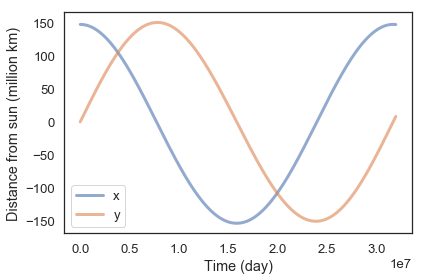

In [166]:
# And plotting
plot(results.x/1e9, label='x')
plot(results.y/1e9, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

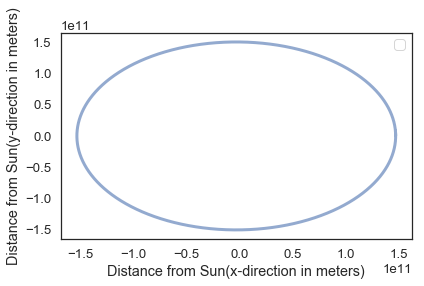

In [170]:
plot(results.x, results.y)
decorate(
         xlabel ='Distance from Sun(x-direction in meters)',
         ylabel = 'Distance from Sun(y-direction in meters)')